# Exploratory Data Analysis

Done on the the Art_and_History and Recreation subsets of the google reviews dataset. Find EDA for Food_and_Beverage and Ammenities subsets in ../Emma1 

First script and command chain cleaning functions for the Art_and_History and Recreation subsets of the google reviews dataset are loaded.

In [3]:
# Import python modules

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pdp

from Scripts.MS2_CleanRawData import load_clean_Recreation
from Scripts.MS2_CleanRawData import load_clean_Art_and_History

# Load cleaned Recreation and Art_and_History data subsets as dataframes from the google review data set using functions from MS2_CleanRawData module

Recreation, Outdoors = load_clean_Recreation("../data/raw/google_review_ratings.csv").T
Art = load_clean_Art_and_History("../data/raw/google_review_ratings.csv").T

## Look at DataFrames

In [4]:
print(Recreation)

 #Includes recreational activities in both indoor and outdoor catagories

     Google User ID  Resorts  Beaches  Parks  Zoos  Dance Clubs  \
68          User 69     0.78     0.82   0.85  2.92         1.35   
69          User 70     0.82     0.83   5.00  2.91         1.33   
70          User 71     0.83     0.84   0.86  2.91         1.32   
71          User 72     0.84     0.85   0.88  2.91         1.30   
72          User 73     0.86     0.87   0.90  2.90         1.29   
...             ...      ...      ...    ...   ...          ...   
5451      User 5452     5.00     4.00   2.79  1.09         0.66   
5452      User 5453     5.00     4.02   2.79  1.07         0.65   
5453      User 5454     5.00     4.03   2.80  1.05         0.65   
5454      User 5455     4.05     4.05   2.81  1.03         0.64   
5455      User 5456     4.07     5.00   2.82  1.02         0.64   

      Swimming Pools  Beauty & Spas  View Points  Gardens  
68              0.55           0.50         0.73     0.73  
69              1.36           0.50         0.75     0.74  
70             

In [5]:
print(Outdoors)
 ## Outdoor recreation only. 

     Google User ID  Beaches  Parks  View Points  Gardens
68          User 69     0.82   0.85         0.73     0.73
69          User 70     0.83   5.00         0.75     0.74
70          User 71     0.84   0.86         0.76     0.77
71          User 72     0.85   0.88         0.78     0.80
72          User 73     0.87   0.90         5.00     0.88
...             ...      ...    ...          ...      ...
5451      User 5452     4.00   2.79         5.00     1.56
5452      User 5453     4.02   2.79         5.00     1.09
5453      User 5454     4.03   2.80         5.00     1.11
5454      User 5455     4.05   2.81         5.00     1.12
5455      User 5456     5.00   2.82         5.00     1.17

[4103 rows x 5 columns]


In [6]:
print(Art)

     Google User ID  Churches  Theatres  Museums  Art Galleries  Monuments
39          User 40      0.53      5.00     2.95           0.58       0.50
40          User 41      0.54      5.00     2.95           1.62       0.51
41          User 42      0.54      5.00     2.95           1.61       0.51
42          User 43      0.55      5.00     2.95           1.60       0.52
43          User 44      0.56      3.76     2.95           1.59       0.53
...             ...       ...       ...      ...            ...        ...
5451      User 5452      0.91      2.77     2.57           5.00       5.00
5452      User 5453      0.93      2.78     2.57           0.89       5.00
5453      User 5454      0.94      2.78     2.57           0.87       5.00
5454      User 5455      0.95      2.79     2.44           5.00       5.00
5455      User 5456      0.95      2.80     2.57           0.85       5.00

[5150 rows x 6 columns]


## Art and History EDA

In [8]:
# Start with .describe for rudementary overview.
A = Art.describe(percentiles=None, include= 'all', exclude=None).T
print(A)

                 count unique       top freq      mean       std   min   25%  \
Google User ID    5150   5150  User 380    1       NaN       NaN   NaN   NaN   
Churches        5150.0    NaN       NaN  NaN  1.524897  0.786712  0.53  0.98   
Theatres        5150.0    NaN       NaN  NaN  3.024621  1.327539  1.12  1.86   
Museums         5150.0    NaN       NaN  NaN  2.956511  1.276699  1.11  1.85   
Art Galleries   5150.0    NaN       NaN  NaN  2.187819  1.696119   0.5  0.87   
Monuments       5150.0    NaN       NaN  NaN  1.621635  1.300531  0.26  0.84   

                  50%     75%  max  
Google User ID    NaN     NaN  NaN  
Churches        1.355    1.88  5.0  
Theatres          2.7  4.4275  5.0  
Museums          2.74    4.14  5.0  
Art Galleries    1.33  3.6975  5.0  
Monuments         1.1  1.6575  5.0  


### Notes on Art.describe
* All catagories have the max, 5-star review.
* Theatres and museums have a higher review average compared to Churches, Art Galleries, and monuments (Theatres have highest average review in subset).
* Churches have the lowest average review in the subset.
* Monuments contain the lowest review of the subset.

In [9]:
# Run and save pandas_profile for Art_and_History subset 

profile = pdp.ProfileReport(Art, title = "Art and History Exploration Profile")
profile.to_file("Art_and_History.html")


Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Notes on Art and History Profile Report
* Users who rated churches high typically ratted churches low.
* Users who rated churches higher rated monuments higher (positively correlated).
* Museums and theatres have more medium and high reviews compared to other catagories that show more clustering of low reviews.
* People who rated Theatres high rated art galleries lower, and vice versa (negatively correlated).
* Museums and Art Galleries are negatively correlated for those who reviewed one of the catagories higher but are positively correlated for users that gave a lower review for either of the catagories.

## Recreation EDA

In [10]:
## Move to Recreation
R = Recreation.describe(percentiles=None, include= 'all', exclude=None).T
print(R)
O = Outdoors.describe(percentiles=None, include= 'all', exclude=None).T
print(O)

                 count unique        top freq      mean       std   min  \
Google User ID    4103   4103  User 3307    1       NaN       NaN   NaN   
Resorts         4103.0    NaN        NaN  NaN  2.425654  1.381474  0.56   
Beaches         4103.0    NaN        NaN  NaN   2.45594  1.151642  0.59   
Parks           4103.0    NaN        NaN  NaN  2.792562  1.293448  0.85   
Zoos            4103.0    NaN        NaN  NaN  2.437275  1.103829  0.86   
Dance Clubs     4103.0    NaN        NaN  NaN  1.237477  1.146805  0.51   
Swimming Pools  4103.0    NaN        NaN  NaN  1.028606  0.941634   0.5   
Beauty & Spas   4103.0    NaN        NaN  NaN  1.233112    1.2411   0.5   
View Points     4103.0    NaN        NaN  NaN  1.965013  1.645791   0.5   
Gardens         4103.0    NaN        NaN  NaN   1.69186  1.224749   0.5   

                  25%   50%    75%  max  
Google User ID    NaN   NaN    NaN  NaN  
Resorts         1.385  2.11   2.76  5.0  
Beaches          1.62  2.13   2.68  5.0  
Parks 

### Notes on Recreation.describe and Ourdoors.describe
* All catagories have the max, 5-star review.
* Parks have the highest average rating for all recreational catagories.
* Zoos and Parks have the highest minimum rating 
* Swimming pools have the lowest average rating overall for all recreation catagories.
* Gardens have the lowest average rating in outdoor recreation catagories.

In [ ]:
import pandas_profiling as pdp
profileR = pdp.ProfileReport(Recreation, title = "Recreation Exploration Profile")
profileR.to_file("Recreation.html")

profileO = pdp.ProfileReport(Outdoors, title = "Outdoor Recreation Exploration Profile")
profileO.to_file("Outdoor_Recreation.html")

### Notes on Recreation Profile Report
* Resort and Beach reviews are positively correlated.
* View Points, Gardens, and Park reviews are positively correlated.
* Zoos reviews are negatively correlated with every catagory except Resorts.
* All Outdoors catagories reviews are positively correlated.

## Visualize Art and History

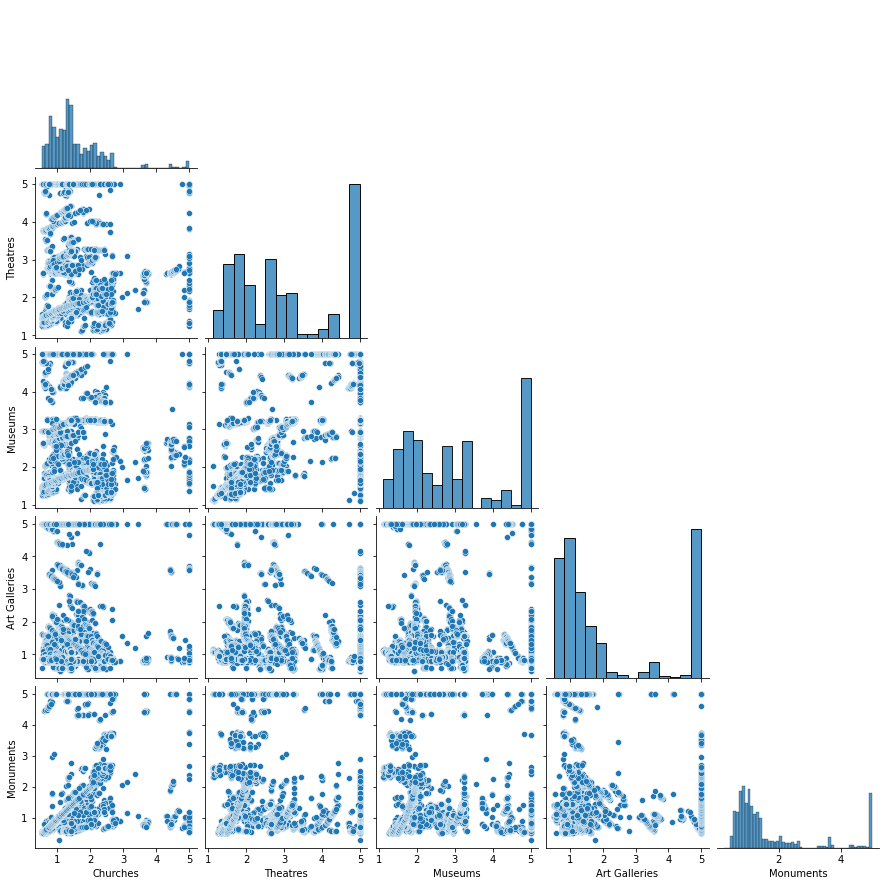

In [15]:
M = sns.pairplot(data=Art.select_dtypes(include='number'), 
             corner=True)

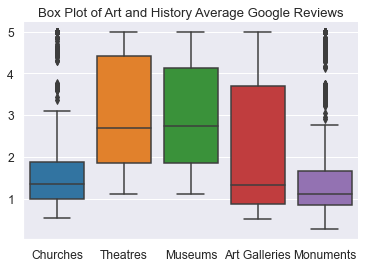

In [28]:
sns.set_style("ticks")
sns.set(font_scale=1.1)
Box_Plot_Art = sns.boxplot(data=Art, orient="v", palette="tab10")
plt.title("Box Plot of Art and History Average Google Reviews") 
sns.despine()

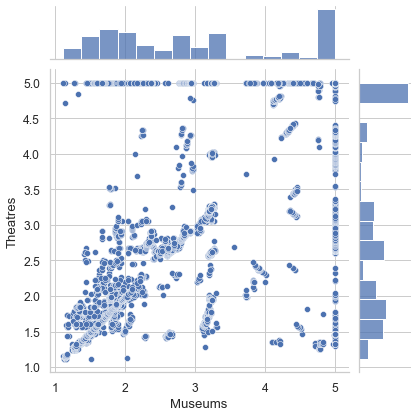

In [31]:
sns.set_style("whitegrid")
sns.jointplot(data=Art,
              x= Art['Museums'],
              y=Art['Theatres'])

In [34]:
sns.heatmap(data=Art)

ValueError: could not convert string to float: 'User 40'